# Advance operation with Business examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data structure: [restaurant_id, 2021, 2022, 2023, 2024]
sales_data = np.array([
    [1, 150000, 180000, 220000, 250000],  # Paradise Biryani
    [2, 120000, 140000, 160000, 190000],  # Beijing Bites
    [3, 200000, 230000, 260000, 300000],  # Pizza Hub
    [4, 180000, 210000, 240000, 270000],  # Burger Point
    [5, 160000, 185000, 205000, 230000]   # Chai Point
])

print("==== Zomato sales analysis ==== ")
print("\n Sales data shape", sales_data.shape) # common operation -> do this always
print("\n Sample data for 1st 3 restau: ", sales_data[0:3]) # or [:3] -> Slicing

print("\n Sample data for 1st 3 restau: ", sales_data[:,1:]) # All rows + start from 1st col to last col.

==== Zomato sales analysis ==== 

 Sales data shape (5, 5)

 Sample data for 1st 3 restau:  [[     1 150000 180000 220000 250000]
 [     2 120000 140000 160000 190000]
 [     3 200000 230000 260000 300000]]

 Sample data for 1st 3 restau:  [[150000 180000 220000 250000]
 [120000 140000 160000 190000]
 [200000 230000 260000 300000]
 [180000 210000 240000 270000]
 [160000 185000 205000 230000]]


### Total Sales per year


In [ ]:
print(np.sum(sales_data, axis=0))
yeary_total = np.sum(sales_data[:, 1:], axis=0)
print(yeary_total) # [ 810000  945000 1085000 1240000]

# np.sum() is a NumPy function that calculates the sum of array elements over a given axis.
# Syntax -> numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=True)

# Parameters:

# a → Input array (list, tuple, or NumPy array).
# axis → The axis/axes along which the sum is computed.
# None (default): sums all elements.
# axis=0: sums column-wise.
# axis=1: sums row-wise.
# dtype → Data type of the result (e.g., np.int64, np.float64).
# out → Alternate output array to store the result.
# keepdims → If True, retains reduced dimensions with size 1.
# initial → Starting value for the sum.
# where → Boolean array for conditional sum.

[     15  810000  945000 1085000 1240000]
[ 810000  945000 1085000 1240000]


### Minimum Sales per Restaurant:

In [7]:
min_sales = np.min(sales_data[:, 1:] , axis= 1)
print(min_sales)

[150000 120000 200000 180000 160000]


### Maximum Sales per Year

In [8]:
max_sales = np.max(sales_data[: , 1:] , axis = 0)
print(max_sales)

[200000 230000 260000 300000]


### Average sales per Restaurant

In [9]:
avg_sales = np.mean(sales_data[: , 1:] , axis = 1)
print(avg_sales)

[200000. 152500. 247500. 225000. 195000.]


### Comulative Sales

In [11]:
cumsum = np.cumsum(sales_data[:, 1:], axis=1)
print(cumsum)
print(cumsum[:, 3:])

[[150000 330000 550000 800000]
 [120000 260000 420000 610000]
 [200000 430000 690000 990000]
 [180000 390000 630000 900000]
 [160000 345000 550000 780000]]
[[800000]
 [610000]
 [990000]
 [900000]
 [780000]]


### How to Plot?

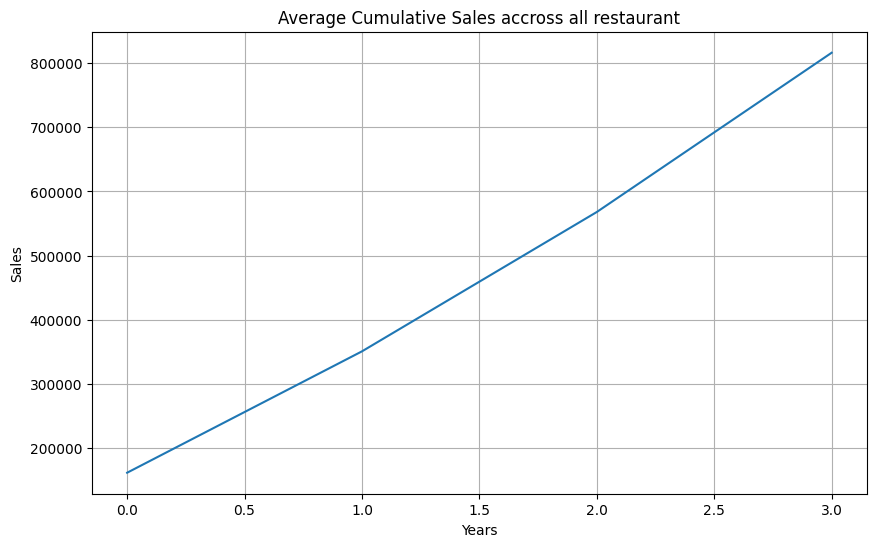

In [13]:
# step1 -> Figure: We want a figure to draw.
plt.figure(figsize = (10 , 6)) # 10 , 6 is the space our fiqure will capture.

# step1 ->What you want to plot ?
plt.plot(np.mean(cumsum , axis=0))
plt.title("Average Cumulative Sales accross all restaurant")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.grid("True") # To show grid
plt.show() # only in jupiter notebook.


# Vector Operations

In [ ]:
vector1 = np.array([1, 2, 3, 4, 5])
vector2 = np.array([6, 7, 8, 9, 10])

print("Vector addition: ", vector1 + vector2) # Element-wise addition

print("\n Multiplication vector", vector1 * vector2) # Element-wise multiplication

print("\nDot Product", np.dot(vector1, vector2)) # Multiply corresponding elements, then sum them.
# The dot product gives a single scalar value

print( vector1 @ vector2) # same as np.dot()


# Finding angle between vector -> Not so useful
angle = np.arccos(np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2)))
print(angle)

Vector addition:  [ 7  9 11 13 15]

 Multiplication vector [ 6 14 24 36 50]

Dot Product 130
130
0.26554161733900966


# Matrix Operations

In [20]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8 , 9],
              [10, 11 , 12]])

# 1. Matrix Addition (A + B) => Element-wise addition:
print("Matrix Addition:\n", A + B) # dimension on A & B has to be equal.

# 2. Element-wise Multiplication (A * B) => (Not matrix multiplication, just Hadamard product)
print("\nElement-wise Multiplication:\n", A * B)

# 3. Matrix Multiplication (np.dot(A, B.T) or A @ B.T) => For real matrix multiplication, the inner dimensions must match.
print("\nMatrix Multiplication (A @ B.T):\n", A @ B.T)

# 4. Dot Product (np.dot(A, B.T)) => For matrices, np.dot() is the same as matrix multiplication
print("\nDot Product (np.dot):\n", np.dot(A, B.T))

Matrix Addition:
 [[ 8 10 12]
 [14 16 18]]

Element-wise Multiplication:
 [[ 7 16 27]
 [40 55 72]]

Matrix Multiplication (A @ B.T):
 [[ 50  68]
 [122 167]]

Dot Product (np.dot):
 [[ 50  68]
 [122 167]]


# Vectorised Operations
 Instead of looping element by element (like in normal Python), NumPy applies operations to whole arrays at once.
 This makes code shorter, faster, and more readable.

⚡ Important Note

np.vectorize is basically a convenience tool.
It doesn’t actually make your code faster than a Python loop — it just makes it look more NumPy-like and cleaner.

If performance is important, and you’re dealing with string arrays, you should use NumPy’s built-in string operations (np.char module) instead of np.vectorize.

✅ Example with np.char.upper (faster & recommended):

print(np.char.upper(restaurant_types))  ===>  ['BIRYANI' 'CHINESE' 'PIZZA' 'BURGER' 'CAFE']

In [ ]:
# Traversing through a vector.
restaurant_types = np.array(['biryani', 'chinese', 'pizza', 'burger', 'cafe'])
vectorized_upper = np.vectorize(str.upper)
print("Vectorized Upper", vectorized_upper(restaurant_types))
# np.vectorize: It takes a normal Python function (like str.upper) and 
# makes it work element-wise on NumPy arrays, as if you looped over each element.
# So instead of writing a loop like:  [s.upper() for s in restaurant_types]
# you can just use: vectorized_upper(restaurant_types)


# Ex2 -> If numpy array has numbers
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])

print(arr1 + arr2)   # [ 6  8 10 12]

# Broadcasting
Broadcasting is NumPy’s way of making arrays with different shapes work together in arithmetic operations.
Instead of forcing you to manually reshape or copy arrays, NumPy “stretches” the smaller array across the bigger one, but only in a way that makes sense mathematically.

📖 Imagine this:
You have a matrix (like a table of numbers, say 2 rows × 3 columns).

You want to add a vector (like a row [10, 20, 30]).
Normally, math says you can’t directly add a 2×3 thing to a 1×3 thing.

But NumPy says:
"I’ll copy that row vector down for each row of the matrix in the background (without actually wasting memory) so the shapes match."

So your 1×3 vector becomes like:
[10 20 30]
[10 20 30]
and now addition works. 🎉

✅ The Rule (in words):
1. When comparing dimensions of two arrays:
2. Start from the last dimension (rightmost).
3. If they are the same → ✅ they match.
4. If one of them is 1 → NumPy stretches it to match the other.
5. If they are different and not 1 → ❌ broadcasting fails.

📌 Example in words:

1. Adding a scalar 5 to a vector [1, 2, 3]: NumPy stretches 5 into [5, 5, 5].

2. Adding [1, 2, 3] to a 2×3 matrix: NumPy repeats the row across both rows.

3. Adding a column vector [1, 2]ᵀ to a 2×3 matrix: NumPy repeats the column across all 3 columns.

In [21]:
monthly_avg = sales_data[:, 1:] / 12 # 12 -> it becomes a matrix of size same as sales_data with value 12.
print(monthly_avg)

[[12500.         15000.         18333.33333333 20833.33333333]
 [10000.         11666.66666667 13333.33333333 15833.33333333]
 [16666.66666667 19166.66666667 21666.66666667 25000.        ]
 [15000.         17500.         20000.         22500.        ]
 [13333.33333333 15416.66666667 17083.33333333 19166.66666667]]
